In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size':18})

def fit1(x0,t):# L inf
    x,y = t
    return np.max(np.abs(x0[0]*x + x0[1]-y))

def fit2(x0,t):# l1
    x,y = t
    return np.sum(np.abs(x0[0]*x + x0[1] - y))

def fit3(x0,t):# L2
    x,y = t
    return np.sum(np.power(np.abs(x0[0]*x + x0[1] - y),2))

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 3.640022
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 6.234182
         Iterations: 49
         Function evaluations: 92


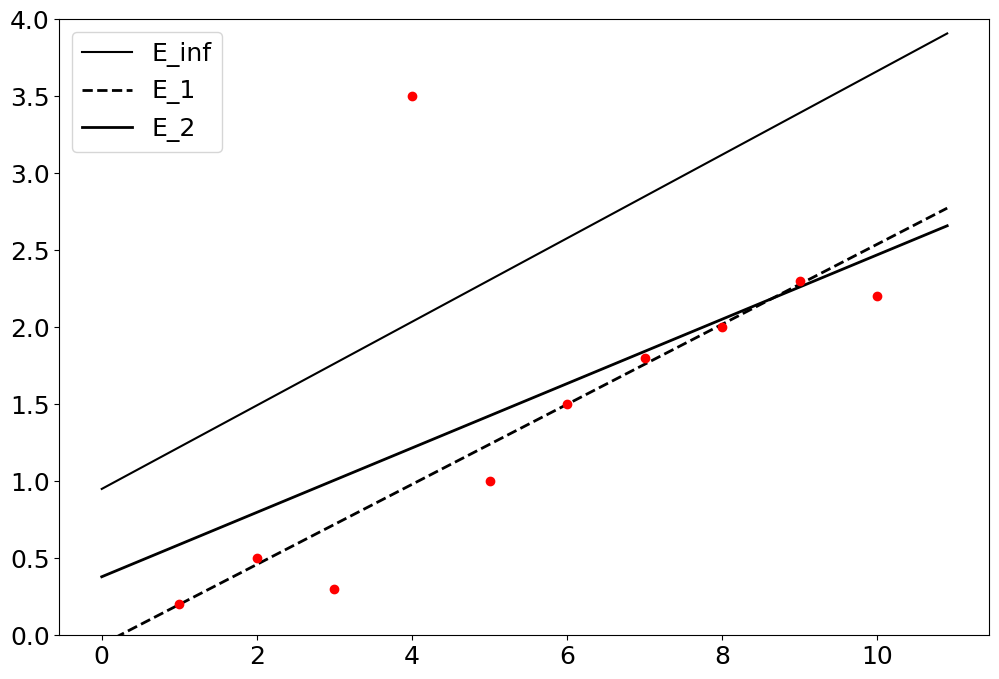

In [18]:
# The data
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)


x0 = np.array([1,1])
p1 = scipy.optimize.fmin(fit1, x0, args = (t,))
p2 = scipy.optimize.fmin(fit2, x0, args = (t,))
p3 = scipy.optimize.fmin(fit3, x0, args = (t,))

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)

plt.figure()
plt.plot(xf, y1, 'k', label = 'E_inf')
plt.plot(xf, y2, '--k', label = 'E_1', linewidth = 2)
plt.plot(xf, y3, 'k', label = 'E_2', linewidth = 2)
plt.plot(x, y, 'or', linewidth = 2)

plt.ylim(0,4)
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 3.640022
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 6.234182
         Iterations: 49
         Function evaluations: 92


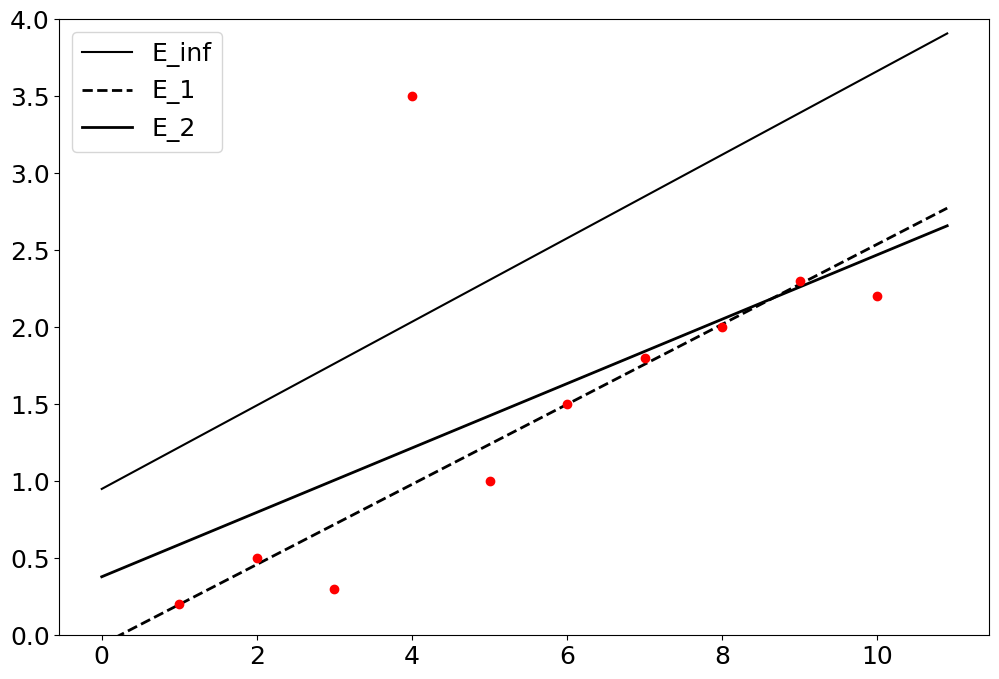

In [20]:
# The data
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)


x0 = np.array([1,1])
p1 = scipy.optimize.fmin(fit1, x0, args = (t,))
p2 = scipy.optimize.fmin(fit2, x0, args = (t,))
p3 = scipy.optimize.fmin(fit3, x0, args = (t,))

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)

plt.figure()
plt.plot(xf, y1, 'k', label = 'E_inf')
plt.plot(xf, y2, '--k', label = 'E_1', linewidth = 2)
plt.plot(xf, y3, 'k', label = 'E_2', linewidth = 2)
plt.plot(x, y, 'or', linewidth = 2)

plt.ylim(0,4)
plt.legend()
plt.show()

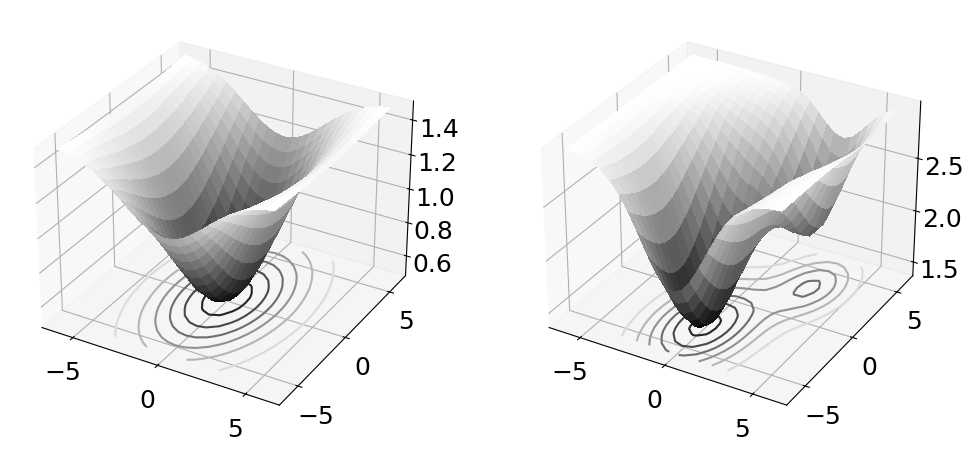

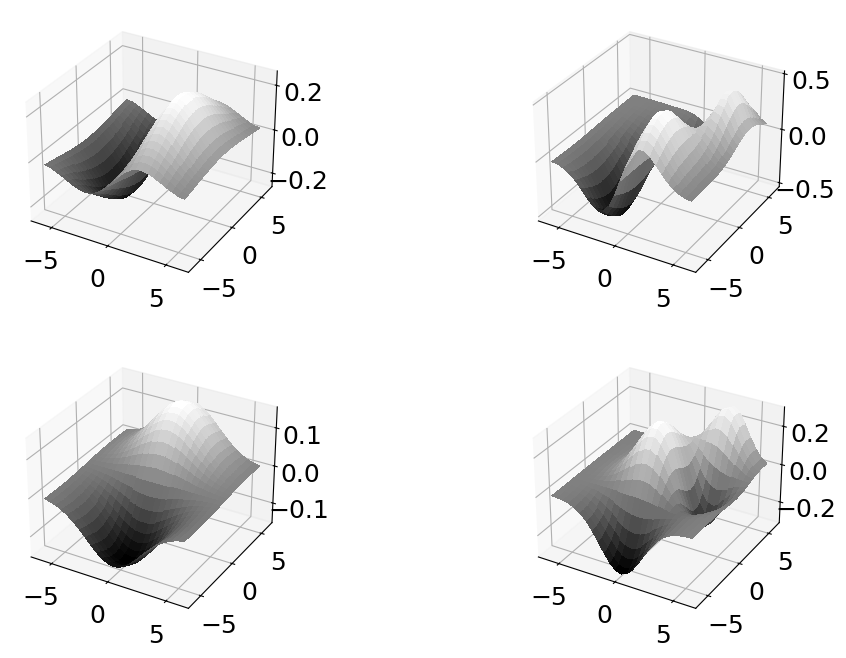

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size':18})

h = 0.5
x = np.arange(-6, 6+h,h)
y = np.arange(-6, 6+h,h)

X,Y = np.meshgrid(x,y)
F0 = 1.5 - 1.0*np.exp(-0.03*(3*np.power(X,2) + np.power(Y,2)))
F = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X,2) + np.power(Y+3,2)))
F2 = F + 1.5 - 1.0*np.exp(-0.1*(3*np.power(X-3,2) + np.power(Y-3,2)))

dF0y, dF0x =  np.gradient(F0,h,h)
dF2y, dF2x =  np.gradient(F2,h,h)


fig, axs =  plt.subplots(1,2,subplot_kw = {'projection':'3d'})
axs[0].plot_surface(X,Y, F0, cmap = 'gray', linewidth = 0, antialiased = False)
axs[0].contour(X,Y, F0, zdir = 'z', offset = axs[0].get_zlim()[0], cmap = 'gray')
axs[1].plot_surface(X,Y, F2, cmap = 'gray', linewidth = 0, antialiased = False)
axs[1].contour(X,Y, F2, zdir = 'z', offset = axs[1].get_zlim()[0], cmap = 'gray')

plt.show()

fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)
axs[0].plot_surface(X, Y, dF0x, cmap='gray',linewidth=0, antialiased=False)
axs[2].plot_surface(X, Y, dF0y, cmap='gray',linewidth=0, antialiased=False)
axs[1].plot_surface(X, Y, dF2x, cmap='gray',linewidth=0, antialiased=False)
axs[3].plot_surface(X, Y, dF2y, cmap='gray',linewidth=0, antialiased=False)

plt.show()

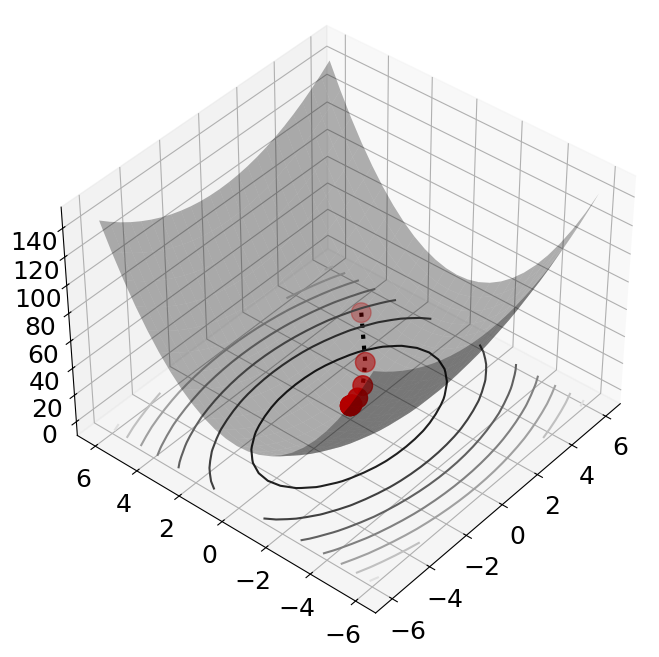

In [14]:
 # Gradient descent
x = np.zeros(10)
y = np.zeros(10)
f = np.zeros(10)

Fquad = np.power(X,2) + 3*np.power(Y,2)

x[0] = 3
y[0] = 2

f[0] = x[0]**2 + 3*y[0]**2 # initial fn value

for j in range(len(x)-1):
    Del = (x[j]**2 + 9*y[j]**2)/(2*x[j]**2 + 54*y[j]**2)
    x[j+1] = x[j] - Del*(2*x[j])
    y[j+1] = y[j] - Del*(3*y[j])
    f[j+1] = x[j+1]**2 + 3*y[j+1]**2
    
    if np.abs(f[j+1] - f[j]) < 10**(-6):
        x = x[:j+2]
        y = y[:j+2]
        f = f[:j+2]
        break
    
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Fquad,linewidth=0,color='k',alpha=0.3)
ax.scatter(x,y,f,'o',color='r',s=200)
ax.plot(x,y,f,':',color='k',linewidth=3)
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
plt.show()


C:\Users\simit\AppData\Local\Temp\ipykernel_16688\1721844748.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[0] = F_interp(x[0],y[0])
C:\Users\simit\AppData\Local\Temp\ipykernel_16688\1721844748.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j+1] = x[j] - Del*dfx
C:\Users\simit\AppData\Local\Temp\ipykernel_16688\1721844748.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[j+1] = y[j] - Del*dfy
C:\Users\simit\AppData\Local\Temp\ipykernel_16688\17

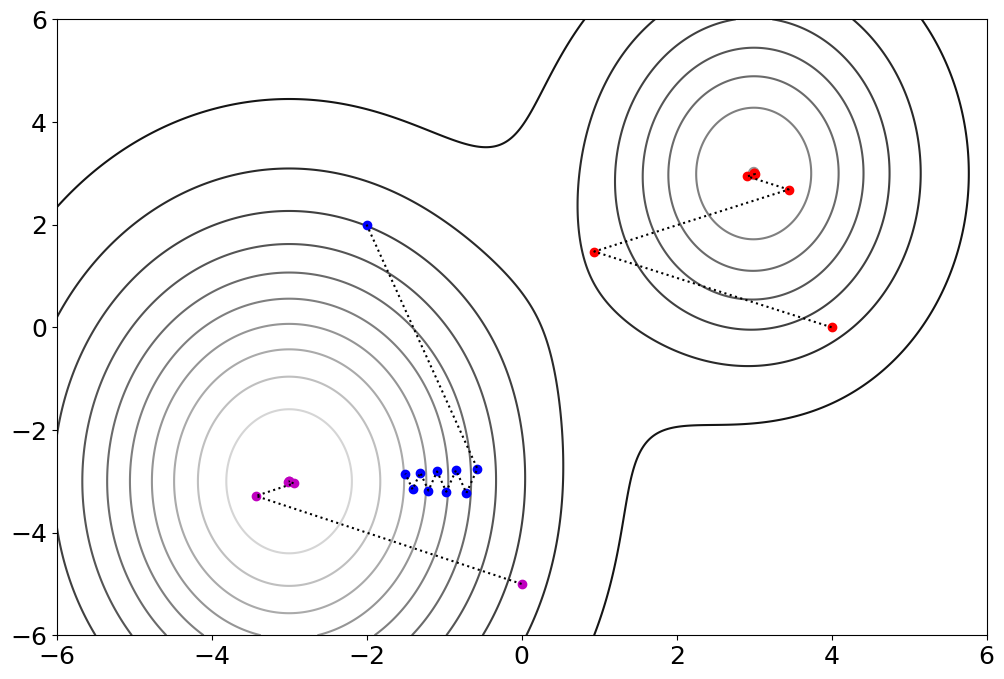

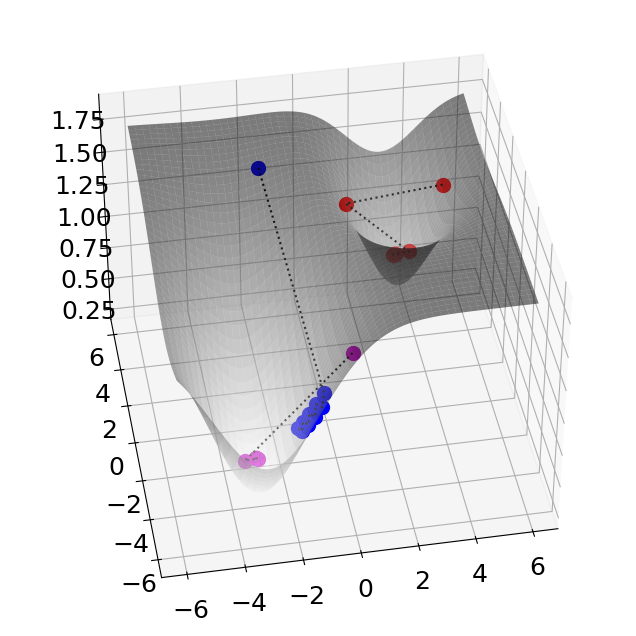

In [19]:

h = 0.01
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X, Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

dFy, dFx = np.gradient(F,h,h)

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)
dFx_interp = scipy.interpolate.RectBivariateSpline(x,y,dFx)
dFy_interp = scipy.interpolate.RectBivariateSpline(x,y,dFy)

x0 = np.array([4,0,-2])
y0 = np.array([0, -5, 2])

def delsearch(Del, t):
    x, y, dfx, dfy, X, Y, F = t
    x0 = x - Del*dfx
    y0 = y - Del*dfy
    return F_interp(x0,y0)

for jj in range(3):
    x = np.zeros(10)
    y = np.zeros(10)
    f = np.zeros(10)
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0],y[0])
    dfx = dFx_interp(x[0],y[0])
    dfy = dFy_interp(x[0],y[0])
    for j in range(len(x) - 1):
        t = x[j], y[j], dfx, dfy, X, Y, F
        Del = scipy.optimize.fmin(delsearch, 0.2, args = (t,), disp = False)
        x[j+1] = x[j] - Del*dfx
        y[j+1] = y[j] - Del*dfy
        f[j+1] = F_interp(x[j+1],y[j+1])
        dfx = dFx_interp(x[j+1],y[j+1])
        dfy = dFy_interp(x[j+1],y[j+1])
        
        if np.abs(f[j+1]-f[j]) < 10**(-6):
            x = x[:j+2]
            y = y[:j+2]
            f = f[:j+2]
            break

    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f            
 

plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()


fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

C:\Users\simit\AppData\Local\Temp\ipykernel_16688\2989780145.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[0] = F_interp(xa[0],ya[0])
C:\Users\simit\AppData\Local\Temp\ipykernel_16688\2989780145.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[j] = F_interp(xa[j],ya[j])


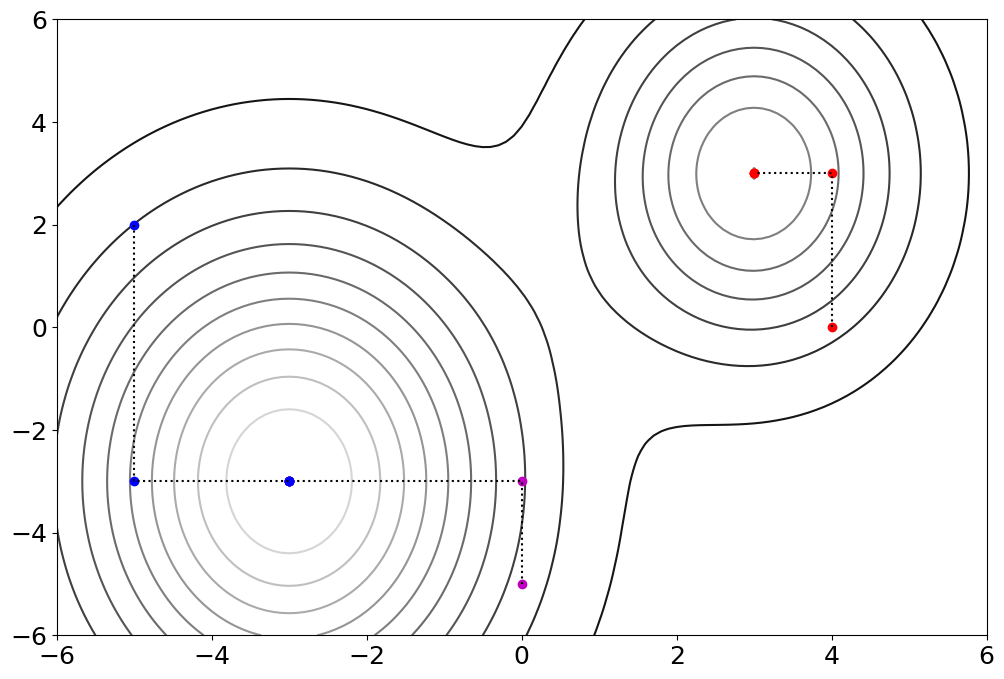

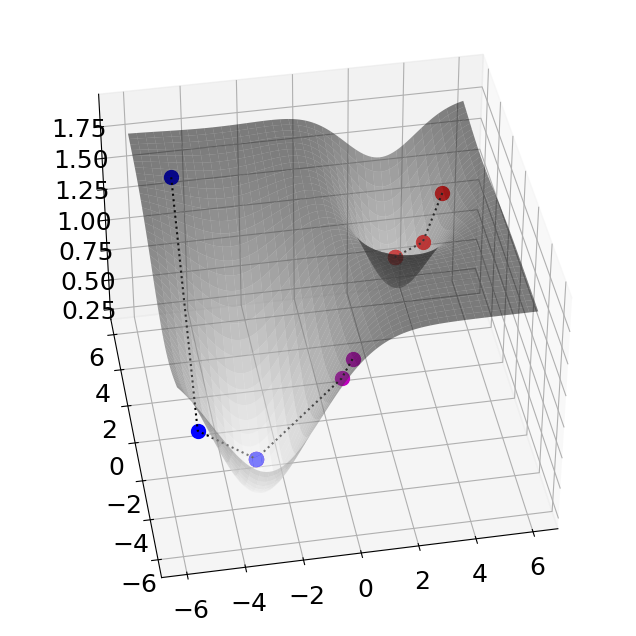

In [21]:
## Alternating Descent
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)

x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0],ya[0])
    
    fx = F_interp(xa[0],y)
    xa[1]=xa[0]
    ya[1]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[1])
    ya[2]=ya[1]
    xa[2]=x[np.argmin(fy)]
    
    fx = F_interp(xa[2],y)
    xa[3]=xa[2]
    ya[3]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[3])
    ya[4]=ya[3]
    xa[4]=x[np.argmin(fy)]
    
    for j in range(1,5):
        f[j] = F_interp(xa[j],ya[j])
    
    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f
        
        
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

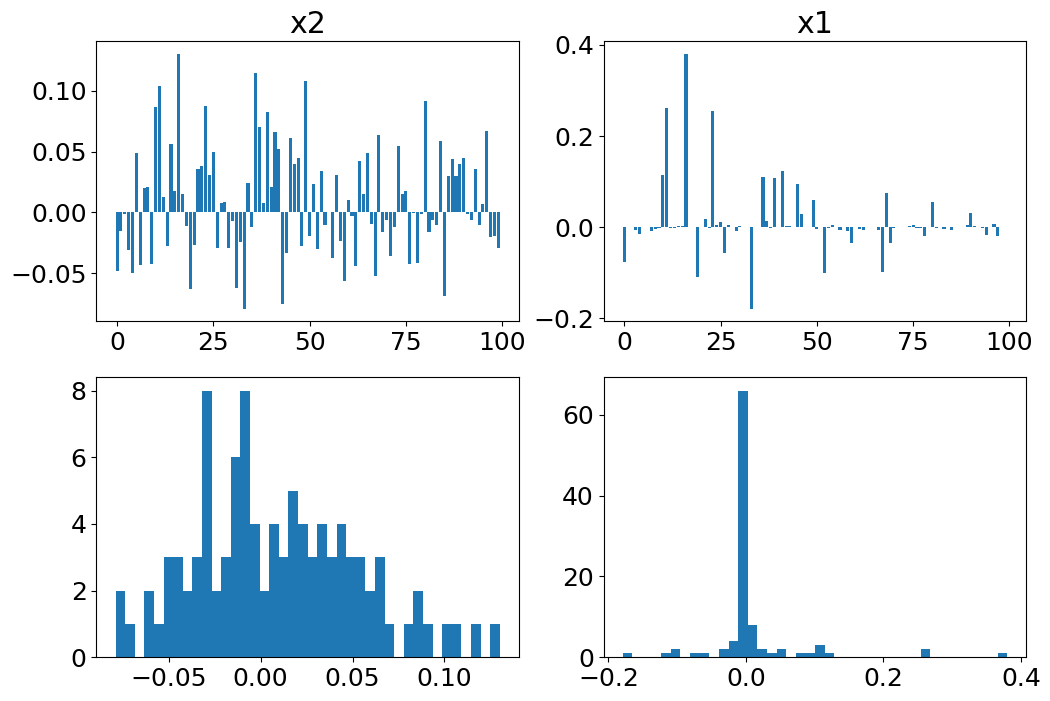

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size':18})

# Under determined system
n = 20
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

def two_norm(x):
    return np.linalg.norm(x, ord =2)

constr = ({'type': 'eq', 'fun': lambda x: A@x - b})
x0 = np.random.rand(m)
res = minimize(two_norm, x0, method = 'SLSQP', constraints = constr)
x2 = res.x


def one_norm(x):
    return np.linalg.norm(x, ord =1)

res = minimize(one_norm, x0, method = 'SLSQP', constraints = constr)
x1 = res.x


fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].bar(range(m),x2)
axs[0].set_title('x2')
axs[1].bar(range(m),x1)
axs[1].set_title('x1')

axs[2].hist(x2,40)
axs[3].hist(x1,40)


plt.show()

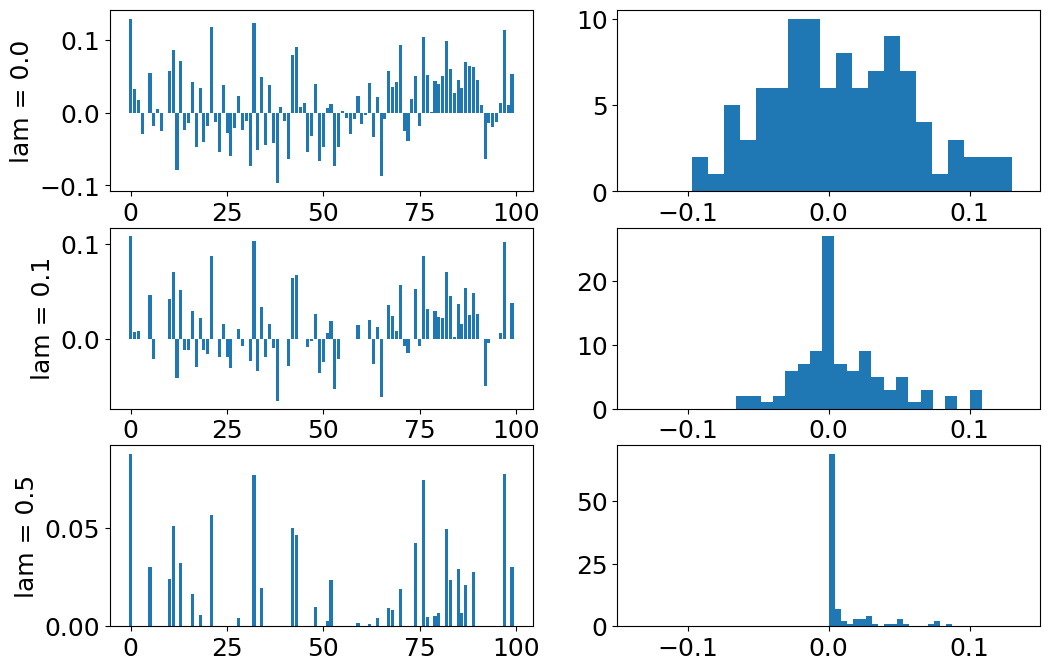

In [11]:
# Over determined system
n = 500
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

xdag = np.linalg.pinv(A)@b

lam = np.array([0, 0.1, 0.5])

def reg_norm(x,A,b,lam):
    return np.linalg.norm(A@x-b, ord = 2) + lam*np.linalg.norm(x,ord = 1)

fig, axs = plt.subplots(len(lam),2)
for j in range(len(lam)):
    res = minimize(reg_norm, args = (A,b, lam[j]), x0 = xdag)
    x = res.x
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam = '+str(lam[j]))
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)
    


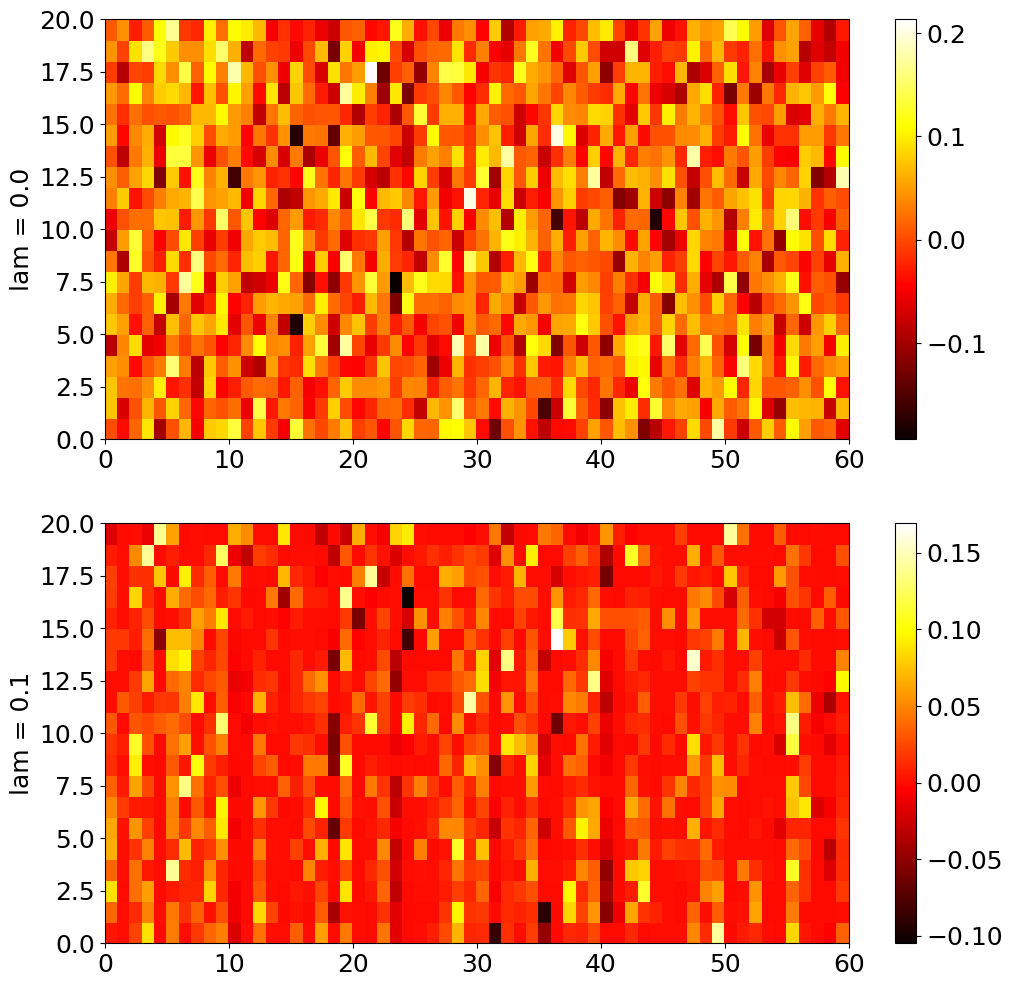

In [14]:
# Matrix over determined system
plt.rcParams['figure.figsize'] = [12,12]


n = 300
m = 60
p = 20
A = np.random.rand(n,m)
b = np.random.rand(n,p)
lam = np.array([0,0.1])

xdag = np.linalg.pinv(A)@b
xdag = xdag.reshape(-1)

def reg_norm_2d(x, A, b, lam, m, p):
    x = np.reshape(x, (m,p))
    return np.linalg.norm(A@x - b, ord = 2) + lam*np.linalg.norm(x,ord = 1)

fig, axs = plt.subplots(len(lam), 1)
for j in range(len(lam)):
    res = minimize(reg_norm_2d, args = (A,b,lam[j],m,p), x0 = xdag)
    x = res.x
    x = x.reshape(m,p)
    x_pcolor = axs[j].pcolor(x.T, cmap = 'hot')
    fig.colorbar(x_pcolor, ax = axs[j])
    axs[j].set_ylabel('lam = ' + str(lam[j]))
    
plt.show()


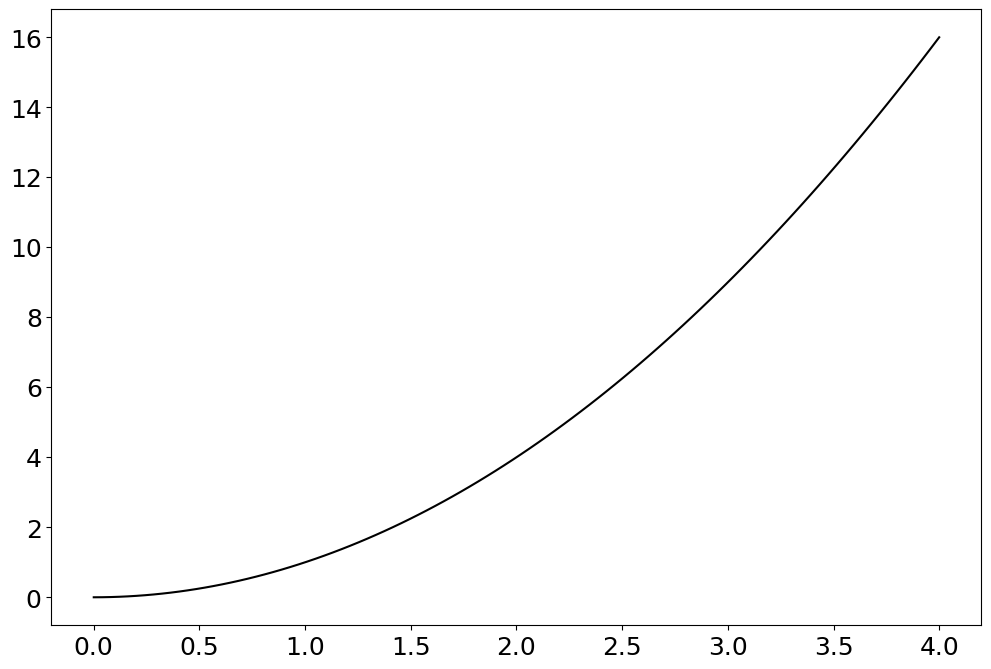

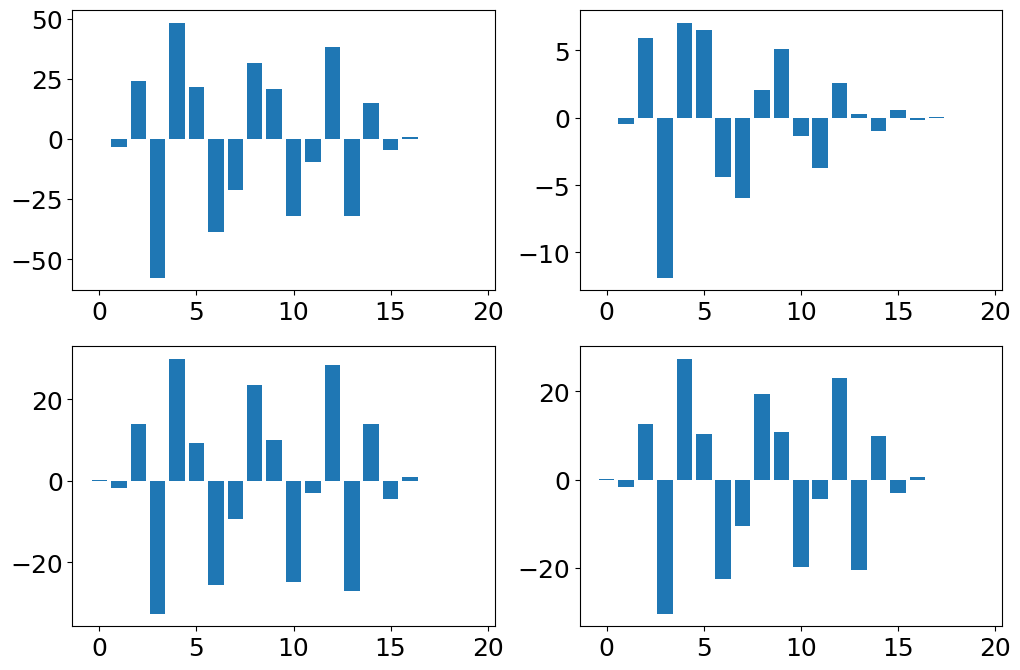

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size':18})

n = 100
L = 4
x = np.linspace(0, L, n)
f = np.power(x,2)

M = 20

phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j)
    
plt.figure()
plt.plot(x,f, 'k')

fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
    an = np.linalg.pinv(phi)@fn
    fna = phi@an
    En = np.linalg.norm(f-fna, ord = 2)/np.linalg.norm(f, ord = 2)
    axs[j].bar(range(len(an)),an)
    
plt.show()


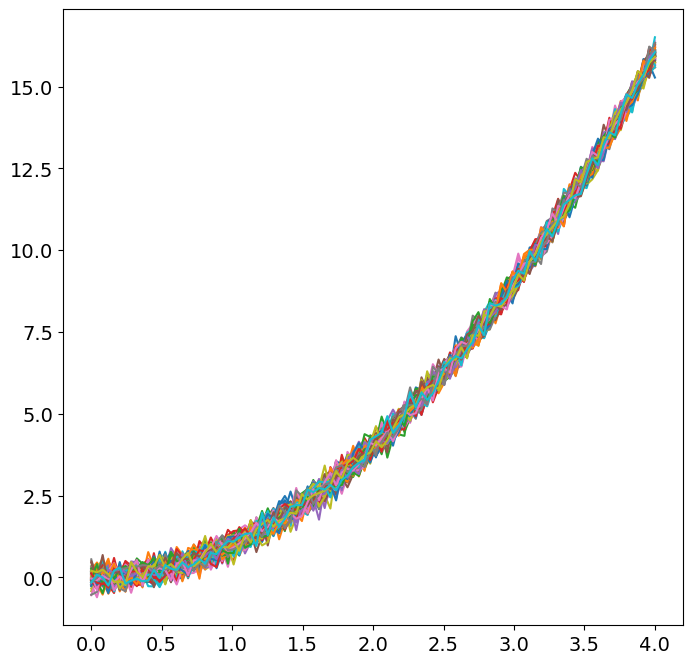

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.figure()
plt.plot(x, f, 'k')

lam = 0.1
phi2 = phi[:,1:]
E1 = np.zeros(100)
E2 = np.zeros(100)
E3 = np.zeros(100)
E4 = np.zeros(100)
E5 = np.zeros(100)
E6 = np.zeros(100)


A1 = np.zeros((M,100))
A2 = np.zeros((M,100))
A3 = np.zeros((M,100))
A4 = np.zeros((M,100))
A5 = np.zeros((M,100))
A6 = np.zeros((M,100))


for jj in range(100):
    f = np.power(x,2) + 0.2*np.random.randn(n)
    
    a1 = np.linalg.pinv(phi)@f
    f1 = phi@a1
    E1[jj] = np.linalg.norm(f-f1, ord = 2)/np.linalg.norm(f,ord=2)
    
    a2 = np.linalg.lstsq(phi, f, rcond = None)[0]
    f2 = phi@a2
    E2[jj] = np.linalg.norm(f-f2, ord = 2)/np.linalg.norm(f,ord=2)
    
    regr3 = linear_model.ElasticNet(alpha = 1.0, copy_X = True, l1_ratio = lam, max_iter = 10**5, random_state = 0)
    regr3.fit(phi,f)
    a3 = regr3.coef_
    f3 = phi@a3
    E3[jj] = np.linalg.norm(f-f3, ord = 2)/np.linalg.norm(f,ord=2)
    
    regr4 = linear_model.ElasticNet(alpha = 0.8, copy_X = True, l1_ratio = lam, max_iter = 10**5, random_state = 0)
    regr4.fit(phi,f)
    a4 = regr4.coef_
    f4 = phi@a4
    E4[jj] = np.linalg.norm(f-f4, ord = 2)/np.linalg.norm(f,ord=2)
    
    huber = linear_model.HuberRegressor().fit(phi,f)
    a5 = huber.coef_
    f5 = phi@a5
    E5[jj] = np.linalg.norm(f-f5, ord = 2)/np.linalg.norm(f,ord=2)
    
    ridge = linear_model.HuberRegressor(alpha = 1.0).fit(phi,f)
    a6 = ridge.coef_
    f6 = phi@a6
    E6[jj] = np.linalg.norm(f-f6, ord = 2)/np.linalg.norm(f,ord=2)
    
    
    A1[:,jj] = a1
    A2[:,jj] = a2
    A3[:,jj] = a3
    A4[:,jj] = a4
    A5[:,jj] = a5
    A6[:,jj] = a6
    
    plt.plot(x, f)
    
Err = np.column_stack((E1, E2, E3, E4, E5, E6))
Err2 = np.column_stack((E1, E2, E3, E4, E5))


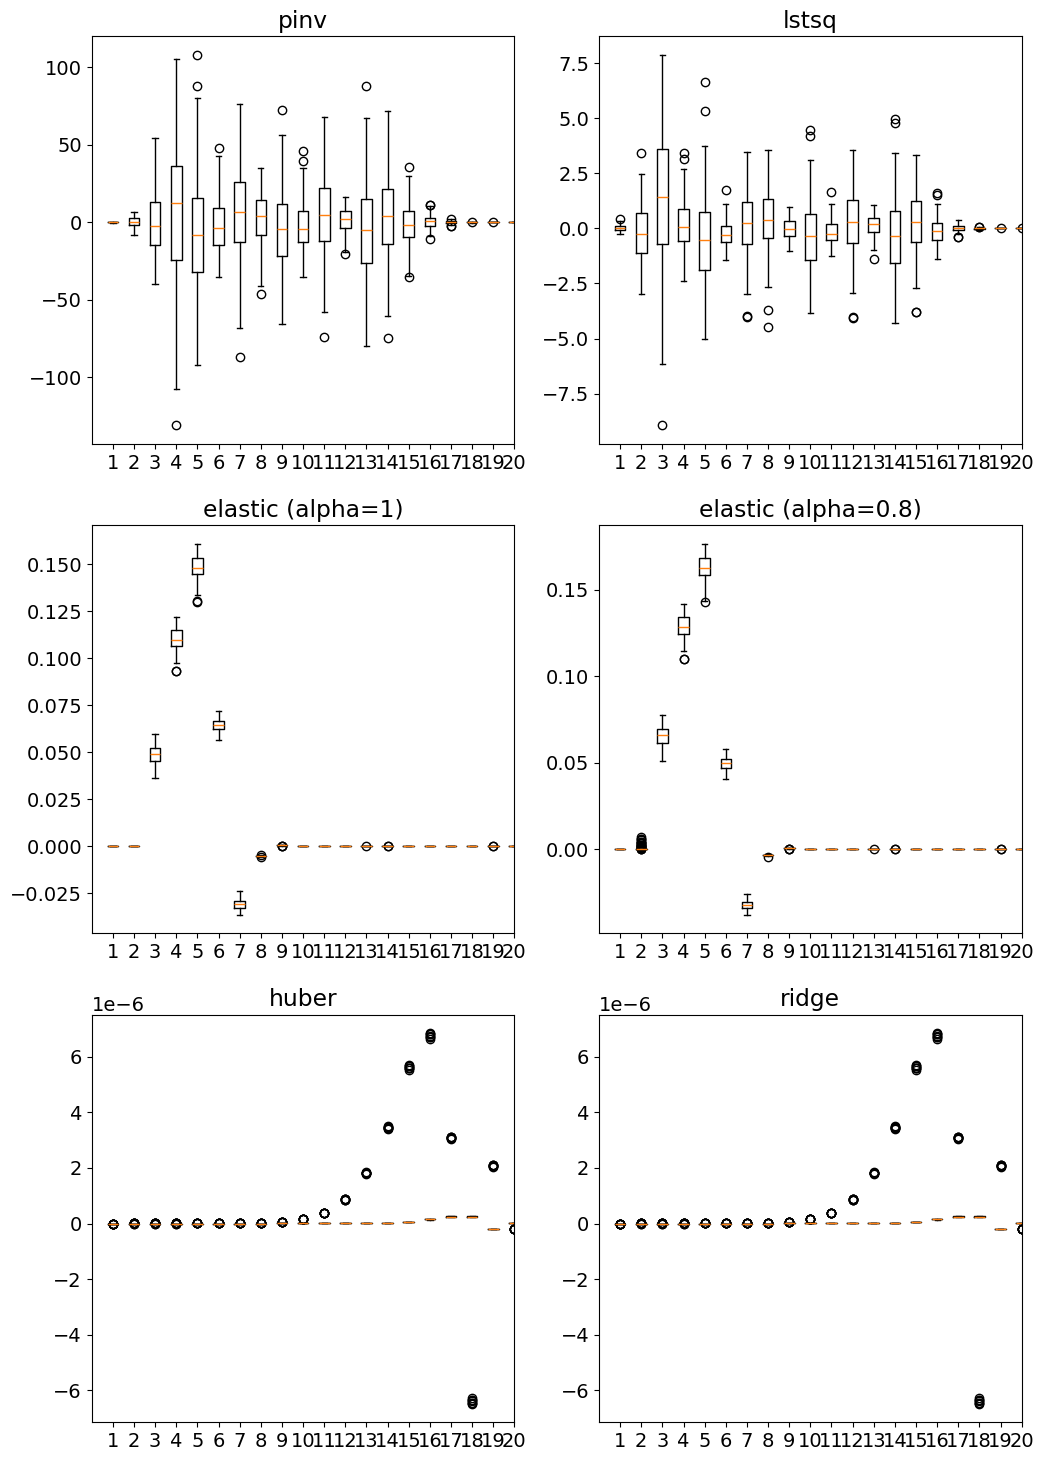

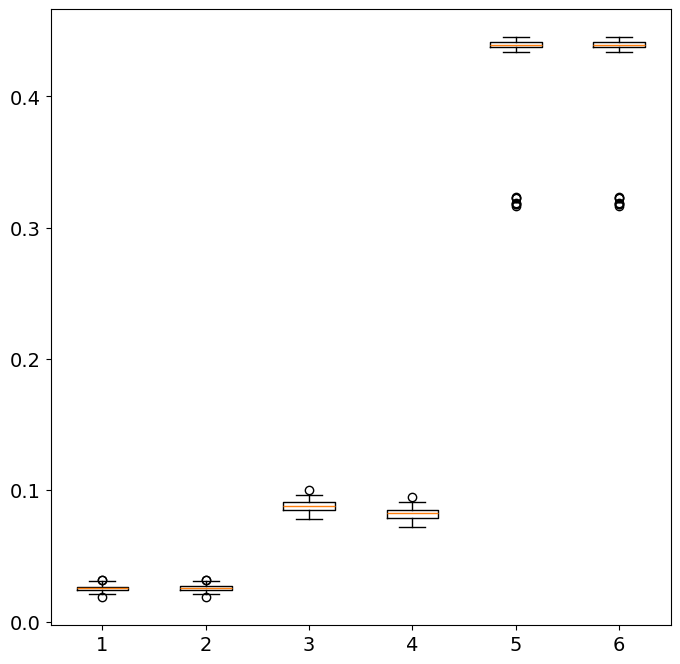

In [20]:
plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 14})

fig,axs = plt.subplots(3,2)
axs = axs.reshape(-1)

axs[0].boxplot(A1.T)
axs[0].set_title('pinv')
axs[1].boxplot(A2.T)
axs[1].set_title('lstsq')
axs[2].boxplot(A3.T)
axs[2].set_title('elastic (alpha=1)')
axs[3].boxplot(A4.T)
axs[3].set_title('elastic (alpha=0.8)')
axs[4].boxplot(A5.T)
axs[4].set_title('huber')
axs[5].boxplot(A6.T)
axs[5].set_title('ridge')

for ax in axs:
    ax.set_xlim(0,M)
    
plt.rcParams['figure.figsize'] = [8, 8]

plt.figure()
plt.boxplot(Err)

plt.show()

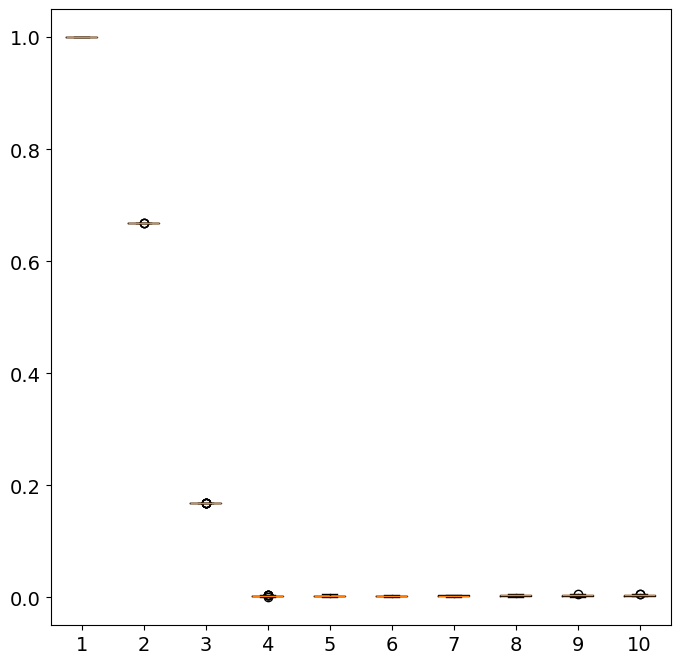

In [21]:
M = 10
En = np.zeros((100,M))
phi = np.zeros((len(x),M))
for jj in range(M):
    for j in range(jj):
        phi[:,j] = np.power(x,j)
    f = np.power(x,2)
    for j in range(100):
        fn = np.power(x,2) + 0.1*np.random.randn(n)
        an = np.linalg.pinv(phi)@fn
        fna = phi@an
        En[j,jj] = np.linalg.norm(f-fna, ord =2)/np.linalg.norm(f,ord=2)
        
plt.boxplot(En)

plt.show()

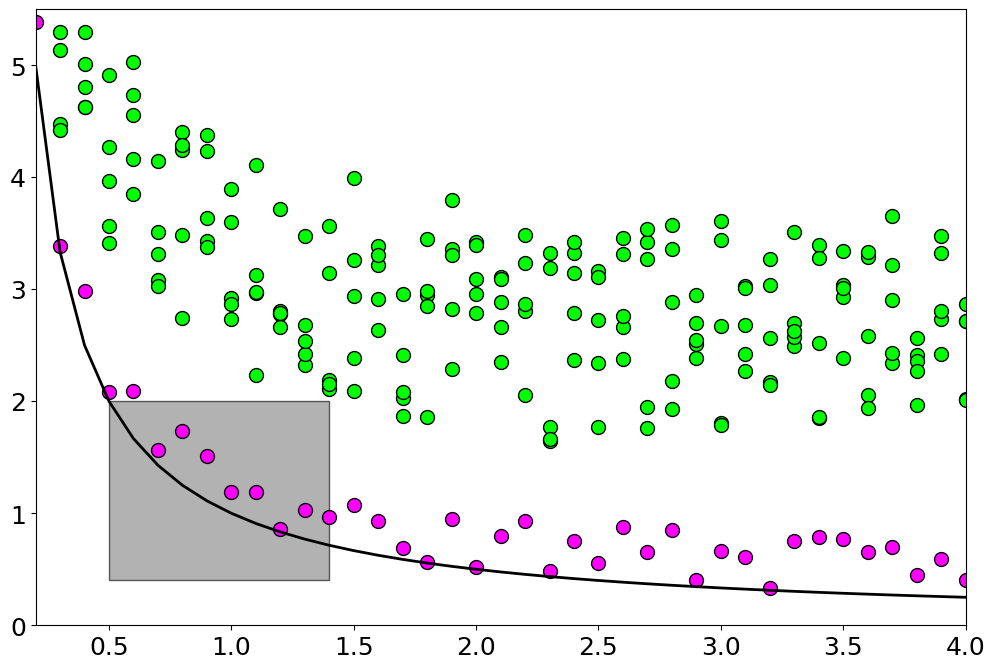

In [28]:
# Pareto frontier and Pareto optimal 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size':18})

fig, ax = plt.subplots(1)
x = np.arange(0.2,5,0.1)
y = np.divide(1,x)

x2 = np.copy(x)
n = len(x2)
y2 = np.divide(1,x2)+0.5*np.random.rand(n)

y3 = (np.tile(y2,(5,1)) + 2*np.random.rand(5,n) + 1)
y3 = np.reshape(y3,-1)
x3 = np.tile(x,(1,5)).reshape(-1)

plt.plot(x,y,'k', linewidth = 2) # pareto frontier

rect = Rectangle((0.5,0.4), 0.9, 1.6, linewidth = 1, edgecolor = 'k', facecolor = 'grey', alpha = 0.6)
ax.add_patch(rect) # pareto optimal region

plt.scatter(x2,y2, 100, color = 'magenta', edgecolors = 'k')
plt.scatter(x3,y3, 100, color = 'lime', edgecolors = 'k')


plt.xlim(0.2,4)
plt.ylim(0,5.5)

plt.show()


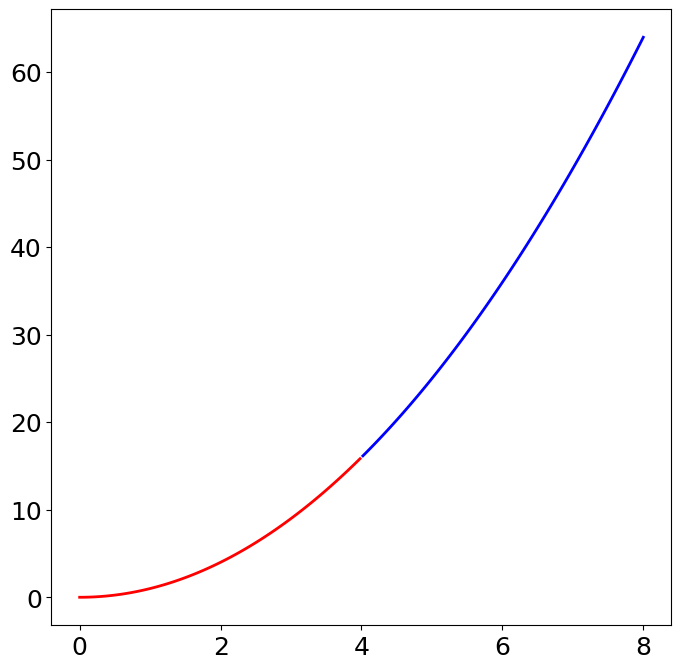

In [39]:
# Cross validate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size':18})

n = 200
L = 8
x = np.linspace(0,L,n)
x1 = x[:100]
x2 = x[100:200]
n1 = len(x1)
n2 = len(x2)
ftrain = np.power(x1,2)
ftest = np.power(x2,2)


plt.plot(x1, ftrain, 'r', linewidth = 2)
plt.plot(x2, ftest, 'b', linewidth = 2)
plt.show()


M = 30 # number of model terms
Eni = np.zeros((100,M))
Ene = np.zeros((100,M))

for jj in range(M):# making models polynomials upto M
    phi_i = np.zeros((n1,jj+1))
    phi_e = np.zeros((n2,jj+1))
    for j in range(jj):# making the phi matrix
        phi_i[:,j] = np.power(x1,j)
        phi_e[:,j] = np.power(x2,j)
        
    f = np.power(x,2)
    for j in range(100):# number of repeats
        fni = np.power(x1,2) + 0.1*np.random.randn(n1)
        fne = np.power(x2,2) + 0.1*np.random.randn(n2)
        
        ani = np.linalg.pinv(phi_i) @ fni
        fnai = phi_i @ ani
        Eni[j,jj]  = np.linalg.norm(ftrain - fnai, ord = 2)/np.linalg.norm(ftrain, ord =2)
        
        fnae = phi_e@ani
        Ene[j,jj]  = np.linalg.norm(ftest - fnae, ord = 2)/np.linalg.norm(ftest, ord =2)
        
        
        

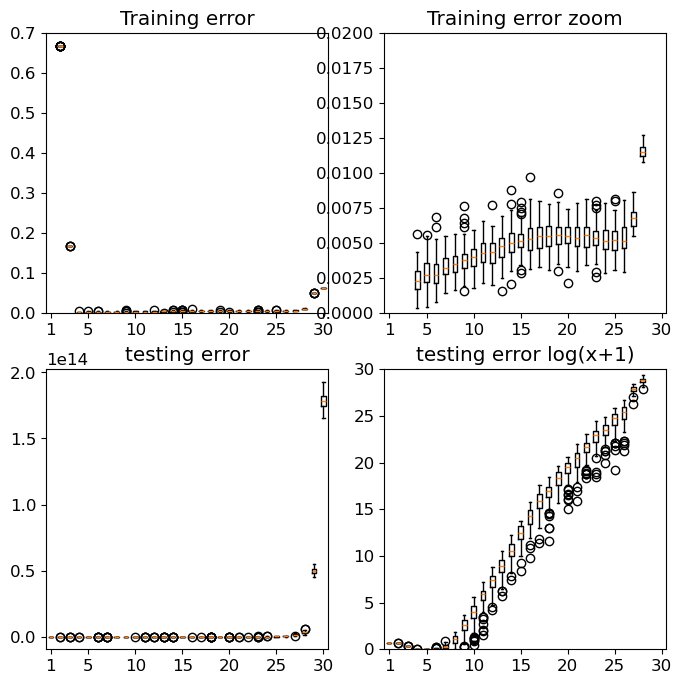

In [43]:
plt.rcParams.update({'font.size':12})

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].boxplot(Eni)
axs[0].set_ylim(0,0.7)
axs[0].set_title("Training error")
axs[1].boxplot(Eni)
axs[1].set_ylim(0,0.02)
axs[1].set_title("Training error zoom")
axs[2].boxplot(Ene)
axs[2].set_title("testing error")
axs[3].boxplot(np.log(Ene+1))
axs[3].set_ylim(0,30)
axs[3].set_title("testing error log(x+1)")

for ax in axs:
    ax.set_xticks((1,5,10,15,20,25,30))
    ax.set_xticklabels((1,5,10,15,20,25,30))

plt.show()



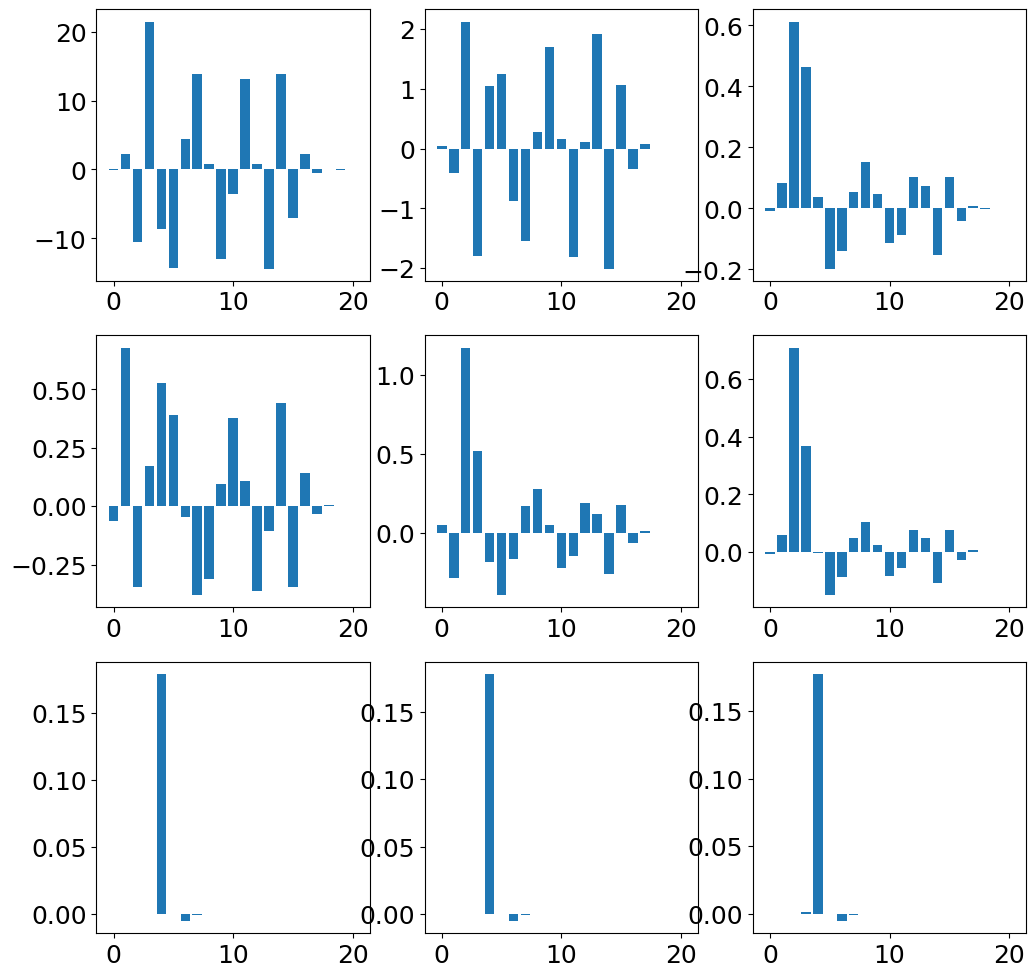

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

n = 100
L = 4
x = np.linspace(0,L,n)
f = np.power(x,2)

M = 21
phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j)
    
trials = np.array([2, 10, 100])

fig, axs = plt.subplots(3,3)

for j in range(len(trials)):
    trial = trials[j]
    E1 = np.zeros(trial)
    E2 = np.zeros(trial)
    E3 = np.zeros(trial)
    
    
    A1 = np.zeros((M,trial))
    A2 = np.zeros((M,trial))
    A3 = np.zeros((M,trial))
    
    for jj in range(trial):
        f = np.power(x,2) + 0.2*np.random.randn(n)
        a1 = np.linalg.pinv(phi)@ f
        f1 = phi@a1
        E1[jj] = np.linalg.norm(f-f1, ord = 2)/np.linalg.norm(f, ord=2)
        
        a2 = np.linalg.lstsq(phi, f, rcond = None)[0]
        f2 = phi@a1
        E2[jj] = np.linalg.norm(f-f2, ord = 2)/np.linalg.norm(f, ord=2)
        
        regr3 = linear_model.Lasso(alpha = 1)
        regr3.fit(phi,f)
        a3 = regr3.coef_
        f3 = phi@a3
        E3[jj] = np.linalg.norm(f-f3, ord = 2)/np.linalg.norm(f, ord=2)
        
        A1[:,jj] = a1
        A2[:,jj] = a2
        A3[:,jj] = a3
        
    A1m = np.mean(A1, axis = 1)
    A2m = np.mean(A2, axis = 1)
    A3m = np.mean(A3, axis = 1)
    
    Err = np.column_stack((E1, E2, E3))
    
    axs[0,j].bar(range(M), A1m)
    axs[1,j].bar(range(M), A2m)
    axs[2,j].bar(range(M), A3m)
    
plt.show() 

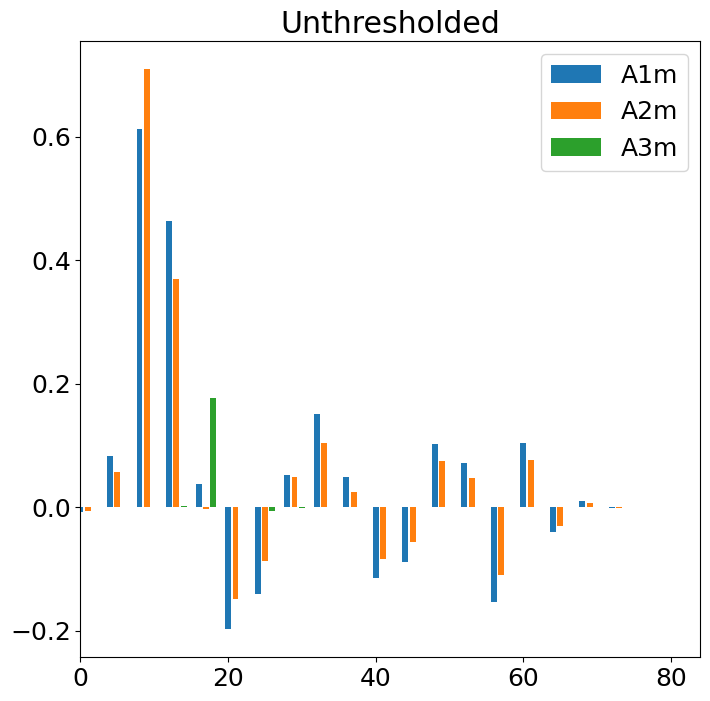

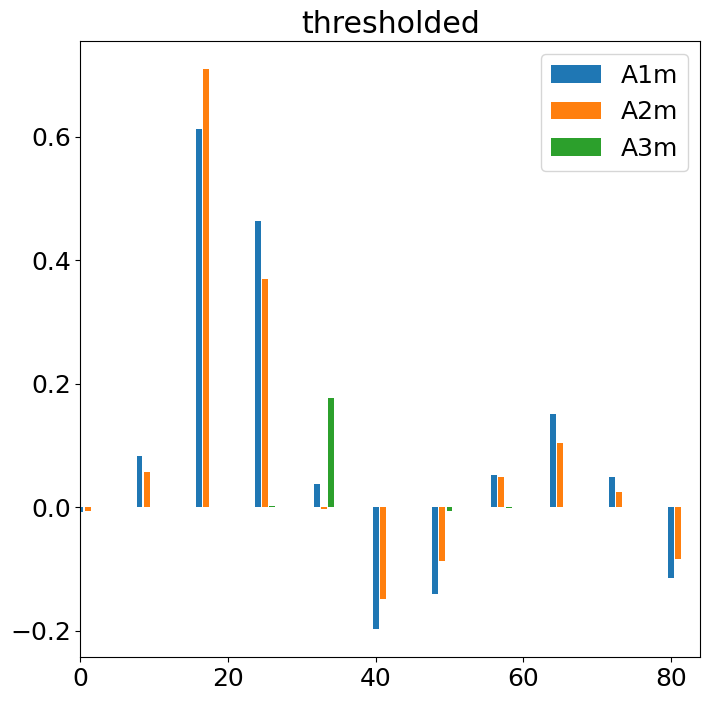

In [47]:
plt.rcParams['figure.figsize'] = [8,8]

Atot = np.column_stack((A1m, A2m, A3m))
Atot2 = (Atot>0.2)* Atot
Atot3 = np.column_stack((Atot, Atot2))

for j in range(3):
    plt.bar(np.arange(Atot.shape[0])*4+j, Atot[:,j], label = 'A'+str(j+1)+'m')
    
plt.xlim(0,4*M)
plt.title('Unthresholded')
plt.legend()

plt.figure()
for j in range(3):
    plt.bar(np.arange(Atot2.shape[0])*8+j, Atot[:,j], label = 'A'+str(j+1)+'m')
 

plt.xlim(0,4*M)
plt.title('thresholded')
plt.legend()


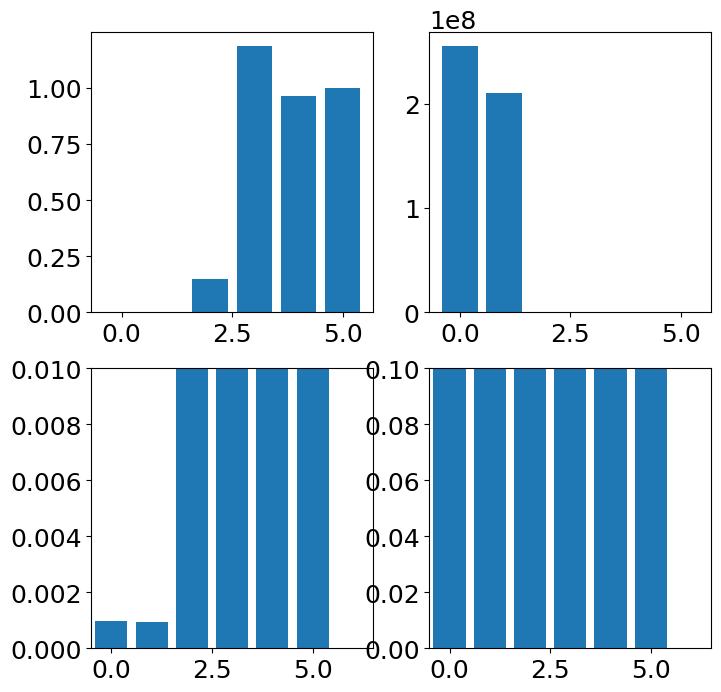

In [53]:
n = 200
L = 8
x = np.linspace(0, L, n)
x1 = x[:100]
x2 = x[100:200]
n1 = len(x1)
n2 = len(x2)
ftrain = np.power(x1, 2)
ftest = np.power(x2, 2)


phi_i = np.zeros((n1,M))
phi_e = np.zeros((n2,M))

for j in range(M):
    phi_i[:,j] = np.power(x1,j)
    phi_e[:,j] = np.power(x2,j)
    
Eni = np.zeros(6)
Ene = np.zeros(6)

for jj in range(6):
    ani = Atot3[:,jj]
    fnai = phi_i @ ani
    Eni[jj] = np.linalg.norm(ftrain - fnai, ord= 2)/np.linalg.norm(ftrain, ord = 2)
    fnae = phi_e@ani
    Ene[jj] = np.linalg.norm(ftest - fnae, ord= 2)/np.linalg.norm(ftest, ord = 2)
    
fig,axs = plt.subplots(2,2)
axs[0,0].bar(range(6),Eni)
axs[0,1].bar(range(6),Ene)
axs[1,0].bar(range(6),Eni)
axs[1,0].set_xlim(-0.5,6.5)
axs[1,0].set_ylim(0,0.01)
axs[1,1].bar(range(6),Ene)
axs[1,1].set_xlim(-0.5,6.5)
axs[1,1].set_ylim(0,0.1)

plt.show()

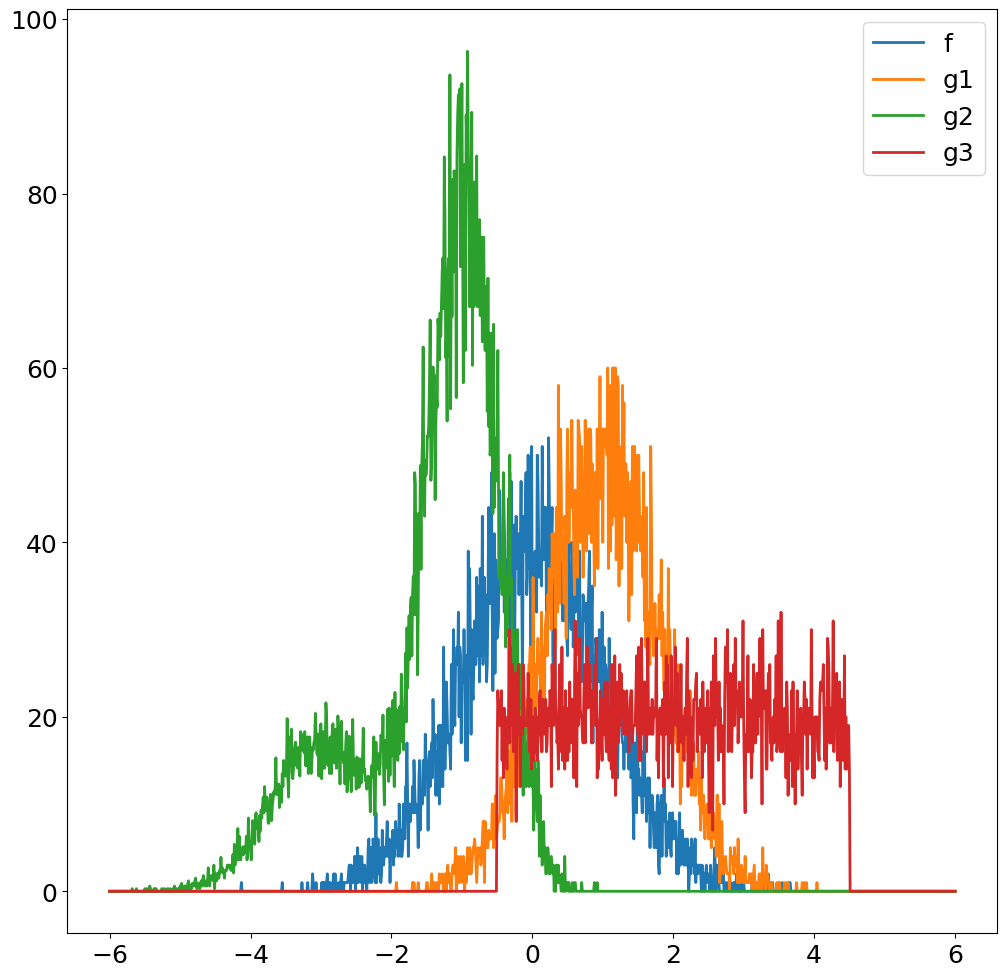

[110.79646635747304, 259.30563826816564, 257.91170757446133]


In [57]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

n = 10000
x1 = np.random.randn(n) # "truth" model (data)
x2 = 0.8 * np.random.randn(n) + 1 # model 1
x3 = 0.5 * np.random.randn(n) - 1 # model 3 components
x4 = 0.7 * np.random.randn(n) - 3
x5 = 5.0 * np.random.rand(n) - 0.5 

x = np.arange(-6,6.01,0.01) # range for data
x_bincenters = np.arange(-6.005,6.01,0.01)

f = np.histogram(x1,bins=x_bincenters)[0] + 0.01 # generate PDFs
g1 = np.histogram(x2,bins=x_bincenters)[0] + 0.01
g2a = np.histogram(x3,bins=x_bincenters)[0]
g2b = np.histogram(x4,bins=x_bincenters)[0]
g2 = g2a + 0.3*g2b + 0.01
g3 = np.histogram(x5,bins=x_bincenters)[0] + 0.01


plt.figure()
plt.plot(x,f,linewidth=2,label='f')
plt.plot(x,g1,linewidth=2,label='g1')
plt.plot(x,g2,linewidth=2,label='g2')
plt.plot(x,g3,linewidth=2,label='g3')
plt.legend()
plt.show()


# KL divergence
# compute integrand
Int1 = f*np.log(np.divide(f,g1))
Int2 = f*np.log(np.divide(f,g2))
Int3 = f*np.log(np.divide(f,g3))

I1 = np.trapz(Int1,x)
I2 = np.trapz(Int2,x)
I3 = np.trapz(Int3,x)

print([I1,I2,I3])

In [67]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA  # Updated import for ARIMA model

np.random.seed(123)
T = 100  # sample size

arparams = np.array([0.2, 0.5])
maparams = np.array([1])

arma_process = ArmaProcess(np.r_[1, -arparams], np.r_[1, maparams])
y = arma_process.generate_sample(T, scale=2)

logL = np.zeros(3)
aic = np.zeros(3)
bic = np.zeros(3)

for j in range(2):
    model_res = ARIMA(y, order=(j+1, 0, 0)).fit()
    logL[j] = model_res.llf
    aic[j] = model_res.aic
    bic[j] = model_res.bic

print('AIC: {}'.format(aic))
print('BIC: {}'.format(bic))


AIC: [477.49051881 478.01087733   0.        ]
BIC: [485.30602937 488.43155807   0.        ]
